# Perkenalan

- Fathur Rachman
- FTDS 003

Pada Graded Challange 2 kali ini, akan memprediksi perkiraan cuaca kapan akan hujan pada hari besok. Data yang digunakan merupakan data dari Kaggle dan lokasi berada di benua Australia. Berikut dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# Import Pustaka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Loading

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#  Data Cleaning

In [5]:
#Berdasarkan intuisi peneliti, kolom tanggal, lokasi, evaporasi, sunshine, cloud9am, cloud3pm tidak dibutuhkan maka akan di drop

data.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis=1, inplace=True)

In [6]:
data

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustDir    135134 non-null  object 
 4   WindGustSpeed  135197 non-null  float64
 5   WindDir9am     134894 non-null  object 
 6   WindDir3pm     141232 non-null  object 
 7   WindSpeed9am   143693 non-null  float64
 8   WindSpeed3pm   142398 non-null  float64
 9   Humidity9am    142806 non-null  float64
 10  Humidity3pm    140953 non-null  float64
 11  Pressure9am    130395 non-null  float64
 12  Pressure3pm    130432 non-null  float64
 13  Temp9am        143693 non-null  float64
 14  Temp3pm        141851 non-null  float64
 15  RainToday      142199 non-null  object 
 16  RainTomorrow   142193 non-null  object 
dtypes: float64(12), object(5)
mem

In [8]:
#Melihat kolom yang masih memiliki null values

data.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
#Melihat tipe data dari masing-masing kolom

data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Kolom WindGustDir, WindDir9am, WindDir3pm, RainToday, dan RainTomorrow memiliki tipe data object. Peneliti akan mencari unique values dari kolom tersebut. Berdasarkan pengetahuan yang dimiliki peneliti, variabel RainToday dan RainTomorrow(?) akan menjadi target atau Y dalam pengolahan data.

In [10]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [11]:
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [12]:
data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [13]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

Data dari RainToday dan RainTomorrow memiliki nilai nan. Hal ini dapat diartikan kalau data tersebut tidak terdata dengan baik oleh pengamat lapangan. Dikarenakan sebagai variabel target dan agar tidak bias dalam menentukan prediksi hujan atau tidak, maka variabel nan akan diisi dengan no.

In [15]:
data['RainToday'] = data['RainToday'].fillna('No')
data['RainTomorrow'] = data['RainTomorrow'].fillna('No')

In [16]:
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [17]:
data.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

Data sudah tidak ada yang memiliki null value, yang berarti data dapat diolah. (belom ini mah)

# Eksplorasi Data

<AxesSubplot:>

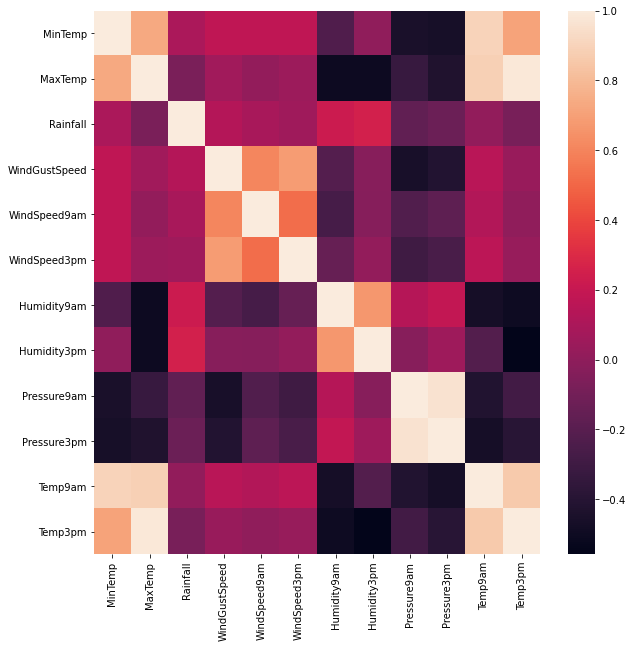

In [18]:
#heatmap

plt.figure(figsize = (10,10))
sns.heatmap(data.corr())

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

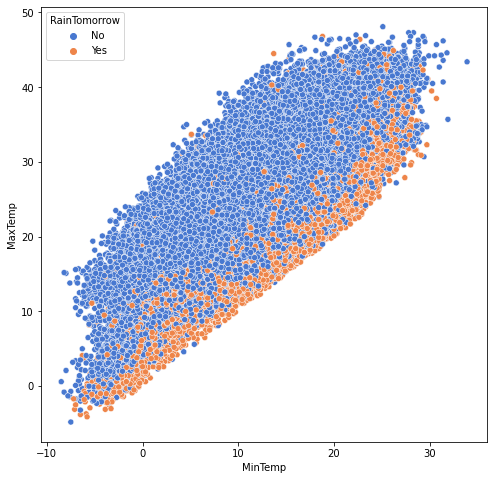

In [19]:
#Terlihat dari Heatmap bahwa MinTemp memiliki korelasi yang kuat dengan MaxTemp, Temp9am, Temp3pm

plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MinTemp', y = 'MaxTemp', hue = 'RainTomorrow' , palette = 'muted', data = data)

<AxesSubplot:xlabel='MinTemp', ylabel='Temp9am'>

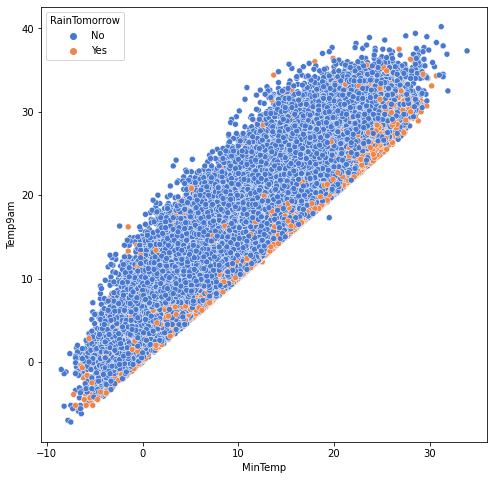

In [20]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MinTemp', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'muted', data = data)

<AxesSubplot:xlabel='MinTemp', ylabel='Temp3pm'>

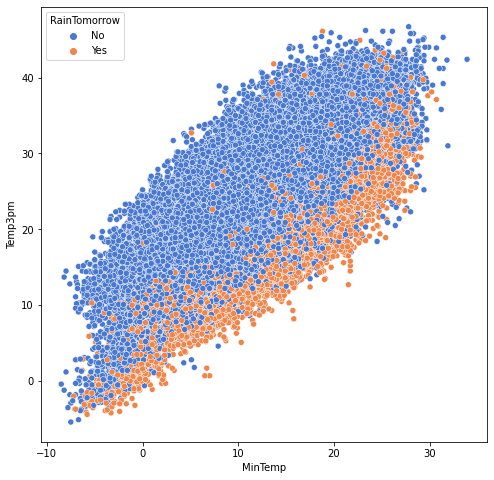

In [21]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MinTemp', y = 'Temp3pm', hue = 'RainTomorrow' , palette = 'muted', data = data)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindSpeed9am'>

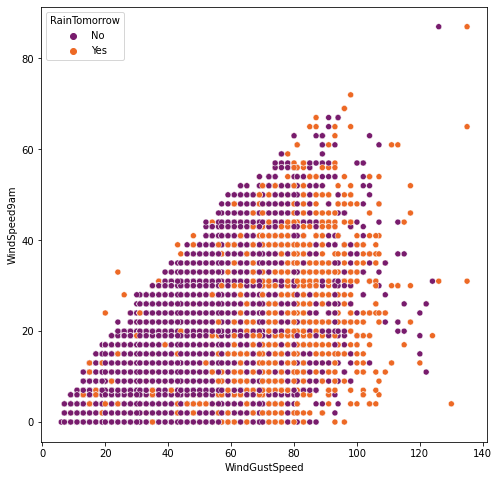

In [22]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'WindGustSpeed', y = 'WindSpeed9am', hue = 'RainTomorrow' , palette = 'inferno',data = data)

# Data Preprocessing

In [23]:
#Melakukan pelabelan (encoder) terhadap tipe data object

le = LabelEncoder()
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [24]:
data

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0
145458,7.8,27.0,0.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0


# Pendefinisian Model

Memisahkan kolom dan menentukan siapa yang menjadi Target (Y) dan menjadi Features (X). Dalam hal ini peneliti memilih Target sebagai RainTomorrow karena akan memprediksi kapan terjadi hujan pada esok hari. Sementara untuk variabel features akan menggunakan kolom selain RainTomorrow.

In [25]:
x = data.drop(columns='RainTomorrow')
y = data.RainTomorrow

In [26]:
#split x dan y menjadi training sets dan testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state = 0)

In [27]:
x_train.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
dtype: object

In [28]:
#Melakukan pengecekan masih ada atau tidaknya missing values

x_train.isnull().sum()

MinTemp           1346
MaxTemp           1147
Rainfall          2928
WindGustDir          0
WindGustSpeed     9247
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1597
WindSpeed3pm      2768
Humidity9am       2425
Humidity3pm       4073
Pressure9am      13590
Pressure3pm      13559
Temp9am           1596
Temp3pm           3243
RainToday            0
dtype: int64

In [29]:
numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [30]:
for col in numerical:
    if x_train[col].isnull().mean()>0:
        print(col, round(x_train[col].isnull().mean(),4))

MinTemp 0.0103
MaxTemp 0.0088
Rainfall 0.0224
WindGustSpeed 0.0706
WindSpeed9am 0.0122
WindSpeed3pm 0.0211
Humidity9am 0.0185
Humidity3pm 0.0311
Pressure9am 0.1038
Pressure3pm 0.1036
Temp9am 0.0122
Temp3pm 0.0248


In [31]:
# mengisi kolom yang masih kosong dengan median dari masing-masing kolom

for data1 in [x_train, x_test]:
    for col in numerical:
        col_median=x_train[col].median()
        data1[col].fillna(col_median, inplace=True)  

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [32]:
x_train.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [33]:
x_test.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [34]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
32416,11.4,20.4,0.0,13,35.0,13,2,22.0,11.0,67.0,51.0,1030.1,1027.9,12.5,18.7,0
135192,11.3,21.2,0.0,10,48.0,10,10,26.0,26.0,55.0,39.0,1017.6,1015.2,15.4,19.9,0
105011,14.5,32.0,0.0,2,43.0,2,0,24.0,9.0,30.0,14.0,1016.8,1014.1,22.3,30.3,0
62362,9.1,18.4,5.4,13,50.0,13,15,31.0,24.0,84.0,57.0,1012.6,1012.8,12.1,17.2,1
40510,11.8,21.4,0.0,14,70.0,14,14,50.0,35.0,46.0,24.0,1005.5,1004.3,15.8,20.7,0


In [35]:
y_train.unique()

array([0, 1])

# Pelatihan Model

In [36]:
#Memasukkan library Logistic Regression untuk melakukan uji model

from sklearn.linear_model import LogisticRegression

In [37]:
LogReg = LogisticRegression(solver='lbfgs', max_iter=1000)
LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

# Predict Results

In [38]:
y_pred_test = LogReg.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 1])

In [39]:
# probability of getting output as 0 - no rain

LogReg.predict_proba(x_test)[:,0]

array([0.86915318, 0.87052897, 0.8570668 , ..., 0.93536505, 0.39718463,
       0.04912478])

In [40]:
# probability of getting output as 1 - rain

LogReg.predict_proba(x_test)[:,1]

array([0.13084682, 0.12947103, 0.1429332 , ..., 0.06463495, 0.60281537,
       0.95087522])

# Accuracy Score

In [41]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8382


In [42]:
y_pred_train = LogReg.predict(x_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(LogReg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(LogReg.score(x_test, y_test)))

Training set score: 0.8394
Test set score: 0.8382


In [44]:
# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(x_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [45]:
print('Training set score: {:.4f}'.format(logreg100.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(x_test, y_test)))

Training set score: 0.8394
Test set score: 0.8383


In [48]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg1000 = LogisticRegression(C=1000, solver='liblinear', random_state=0)


# fit the model
logreg1000.fit(x_train, y_train)

LogisticRegression(C=1000, random_state=0, solver='liblinear')

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg1000.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg1000.score(x_test, y_test)))

Training set score: 0.8394
Test set score: 0.8383


In [49]:
# check class distribution in test set

y_test.value_counts()

0    11328
1     3218
Name: RainTomorrow, dtype: int64

In [50]:
# check null accuracy score

null_accuracy = (11328/(11328+3218))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7788


# Confusion Matrix

In [51]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10776   552]
 [ 1801  1417]]

True Positives(TP) =  10776

True Negatives(TN) =  1417

False Positives(FP) =  552

False Negatives(FN) =  1801


<AxesSubplot:>

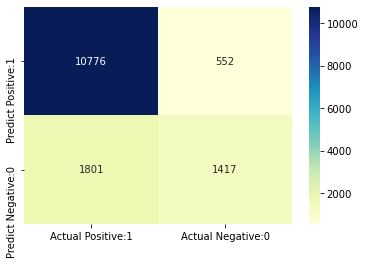

In [52]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')